# 1.) Import Initial Libraries & Read Data

In [71]:
# Import dependencies
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
from datetime import date, timedelta
from pandas.plotting import register_matplotlib_converters

In [72]:
# Read data 
hotel_path = Path('../Data/hotel_bookings.csv')
hotel = pd.read_csv(hotel_path, infer_datetime_format=True, parse_dates=True)
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Feature Defenition:

- hotel: Hotel (H1 = Resort Hotel or H2 = City Hotel)
- is_canceled: Value indicating if the booking was canceled (1) or not (0)
- lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- arrival_date_year: Year of arrival date
- arrival_date_month: Month of arrival date
- arrival_date_week_number: Week number of year for arrival date
- stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- adults: Number of adults
- children: Number of children
- babies: Number of babies
- meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal
- Country: Country of origin. Categories are represented in the ISO 3155–3:2013 format
- market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)
- previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
- previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking
- reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type.
- booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS
- deposit_type: Indication on if the customer made a deposit to guarantee the booking
- agent: ID of the travel agency that made the booking
- company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for
- days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer
- customer_type: Type of booking
- adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- required_car_parking_spaces: Number of car parking spaces required by the customer
- total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)
- reservation_status: Reservation last status
- reservation_status_date: Date at which the last status was set

# 2.) Data Cleaning & Preparation

In [73]:
# Review the shape of the data import
hotel.shape

(119390, 32)

In [74]:
# Check for null values
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [75]:
# Now we will address the null values outlined above

# For the following, features, we will fill null data with a unique value
hotel["country"] = hotel["country"].fillna('Unknown')
hotel["agent"] = hotel["agent"].fillna(0)
hotel["children"] = hotel["children"].fillna(0)

# For the "company" feature, given it is essentially irrelevant (almost entirely null), we will remove the column
hotel.drop(columns=['company'], inplace=True)

In [76]:
# Next, run a check for duplicates
hotel.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [77]:
# Verify that the nulls from above have been addressed
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# 3.) Preliminary Analysis of Data

In [78]:
# Generate summary statistics 
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


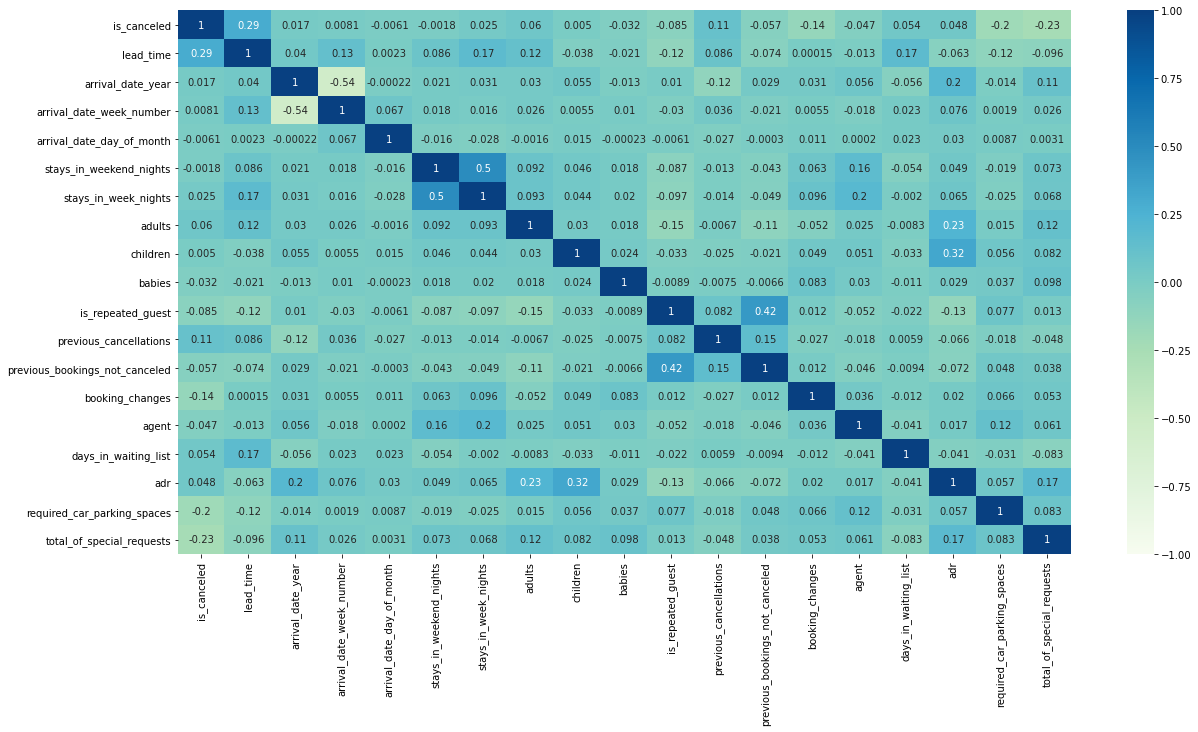

In [79]:
# Identify and plot correlation via heatmap, we may remove any features we believe are highly coorelated
correlation = hotel.corr()
plt.figure(figsize = (20,10))
hotel_corr = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="GnBu").get_figure()

In [80]:
# We are choosing to drop the "reservation_status_date" column and the "reservation_status" column
hotel.drop(columns=['reservation_status_date', 'reservation_status'], inplace=True)

# Verify the dropped column
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1


In [44]:
# Review data types to see if we need to make alterations for modelling
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [45]:
# We will use categorical data assignment to address all non-numerical data types so our ML models will run properly
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(hotel["hotel"])
hotel["hotel"] = label_encoder.transform(hotel["hotel"])

label_encoder.fit(hotel["arrival_date_month"])
hotel["arrival_date_month"] = label_encoder.transform(hotel["arrival_date_month"])

label_encoder.fit(hotel["meal"])
hotel["meal"] = label_encoder.transform(hotel["meal"])

label_encoder.fit(hotel["country"])
hotel["country"] = label_encoder.transform(hotel["country"])

label_encoder.fit(hotel["market_segment"])
hotel["market_segment"] = label_encoder.transform(hotel["market_segment"])

label_encoder.fit(hotel["distribution_channel"])
hotel["distribution_channel"] = label_encoder.transform(hotel["distribution_channel"])

label_encoder.fit(hotel["reserved_room_type"])
hotel["reserved_room_type"] = label_encoder.transform(hotel["reserved_room_type"])

label_encoder.fit(hotel["assigned_room_type"])
hotel["assigned_room_type"] = label_encoder.transform(hotel["assigned_room_type"])

label_encoder.fit(hotel["customer_type"])
hotel["customer_type"] = label_encoder.transform(hotel["customer_type"])

#label_encoder.fit(hotel["reservation_status"])
#hotel["reservation_status"] = label_encoder.transform(hotel["reservation_status"])

label_encoder.fit(hotel["deposit_type"])
hotel["deposit_type"] = label_encoder.transform(hotel["deposit_type"])

# Here, for consistency, we are changing the float types to interger types
hotel["children"] = hotel["children"].astype("int64")

hotel["agent"] = hotel["agent"].astype("int64")

hotel["adr"] = hotel["adr"].astype("int64")

# Review data to ensure the above code has been properly implemented
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   hotel                           119390 non-null  int32
 1   is_canceled                     119390 non-null  int64
 2   lead_time                       119390 non-null  int64
 3   arrival_date_year               119390 non-null  int64
 4   arrival_date_month              119390 non-null  int32
 5   arrival_date_week_number        119390 non-null  int64
 6   arrival_date_day_of_month       119390 non-null  int64
 7   stays_in_weekend_nights         119390 non-null  int64
 8   stays_in_week_nights            119390 non-null  int64
 9   adults                          119390 non-null  int64
 10  children                        119390 non-null  int64
 11  babies                          119390 non-null  int64
 12  meal                            119390 non-n

In [46]:
# Review our updated data set
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,2015,5,27,1,0,0,2,...,2,2,3,0,0,0,2,0,0,0
1,1,0,737,2015,5,27,1,0,0,2,...,2,2,4,0,0,0,2,0,0,0
2,1,0,7,2015,5,27,1,0,1,1,...,0,2,0,0,0,0,2,75,0,0
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,304,0,2,75,0,0
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,240,0,2,98,0,1


In [47]:
# Save the encoded file for forthcoming usage
file_path = Path("../Data/hotel_encoded.csv")
hotel.to_csv(file_path, index=False)

# 5.) Data Preprocessing

In [48]:
# Define X (indpendent) and y (dependent) values for modelling, here we set "is_cancelled" as our target value and the 
X = hotel.drop(columns="is_canceled")
y = hotel["is_canceled"] 

In [49]:
# Check target counts: canceled (1) or not (0)
y.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [54]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create the StandardScaler instance, then scale the X data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# 6.) Model 1: BalancedRandomForestClassifier (Primary Model)

In [55]:
# Train model & fit with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier 
train_brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
train_brfc.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(random_state=1)

In [59]:
# Make "target" predictions using the testing data
predictions = train_brfc.predict(X_test_scaled)

In [60]:
# Import dependencies to evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)
print("Accuracy Score - BRFC - Primary Model")
print(acc_score)

# Render & display results
classification_report = classification_report(y_test, predictions)
print("Classification Report - BRFC - Primary Model")
print(classification_report)

Accuracy Score - BRFC - Primary Model
0.8895068346287859
Classification Report - BRFC - Primary Model
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     18853
           1       0.83      0.88      0.85     10995

    accuracy                           0.89     29848
   macro avg       0.88      0.89      0.88     29848
weighted avg       0.89      0.89      0.89     29848



In [61]:
# Review the model's important features
importances = train_brfc.feature_importances_
sorted(zip(train_brfc.feature_importances_, X.columns), reverse=True)

[(0.12616706953229856, 'lead_time'),
 (0.11608233304888897, 'country'),
 (0.10665261267954108, 'deposit_type'),
 (0.07021625182725132, 'adr'),
 (0.056757619750620235, 'total_of_special_requests'),
 (0.05633161133686403, 'agent'),
 (0.05523392243759516, 'market_segment'),
 (0.05200711503726862, 'arrival_date_day_of_month'),
 (0.04985575344988292, 'arrival_date_week_number'),
 (0.033200533896708045, 'stays_in_week_nights'),
 (0.02869476610584411, 'arrival_date_month'),
 (0.02847900034314672, 'required_car_parking_spaces'),
 (0.027485519350371853, 'customer_type'),
 (0.025626370603860065, 'assigned_room_type'),
 (0.02558397238881633, 'arrival_date_year'),
 (0.024865865466122503, 'previous_cancellations'),
 (0.02190040698342993, 'booking_changes'),
 (0.02155004825162837, 'stays_in_weekend_nights'),
 (0.015032437150745148, 'reserved_room_type'),
 (0.012310312219976145, 'adults'),
 (0.011503315335811419, 'meal'),
 (0.01147200309947324, 'distribution_channel'),
 (0.00801477793657849, 'hotel')

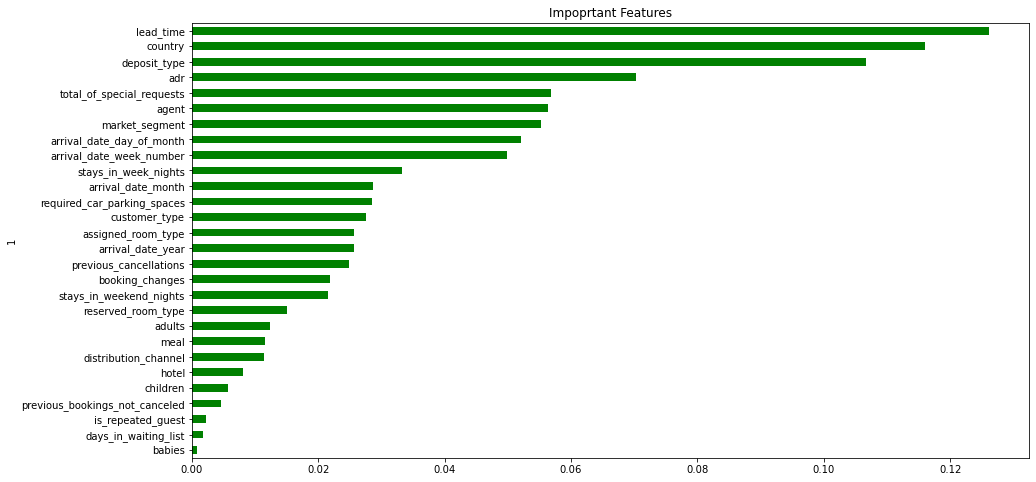

In [62]:
# Display the model's important features for review
importances_df = pd.DataFrame(sorted(zip(train_brfc.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Important Features'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Important Features')
importances_sorted.plot(kind='barh', color='green', title='Impoprtant Features', legend=False, figsize=(15,8))

# 7.) Model 2: LogisticRegression (Supporting Model)

In [63]:
# Train model & fit with the LogisticRegression model
from sklearn.linear_model import LogisticRegression
train_lg = LogisticRegression(solver='lbfgs', random_state=1)
train_lg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [64]:
# Make "target" predictions using the testing data
predictions = train_lg.predict(X_test_scaled)

In [65]:
# Calculate the accuracy score - this is significantly less than Model, so we will end the analysis here
print(accuracy_score(y_test, predictions))

0.7966697936210131


# 8.) Model 3: EasyEnsembleClassifier (Supporting Model)

In [67]:
# Train model & fit with the EasyEnsembleClassifier model
from imblearn.ensemble import EasyEnsembleClassifier
train_eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
train_eec.fit(X_train_scaled, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [68]:
# Make "target" predictions using the testing data
predictions = train_eec.predict(X_test_scaled) 

In [69]:
# Review accuracy using the "balanced accuracy score" - this is significantly less than Model, so we will end the analysis here
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, predictions)

0.824316620485913

# The End